AS.430.271.81: M06 - Adam Thomas

## M06 - Trees and Random Forests

The purpose of this notebook is to predict tree cover type based on various properties of trees.

Import the usual suspect modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
%matplotlib inline

Load tree data based on column names from covtype.info metadata.

In [8]:
col_names = ['elevation', 'aspect', 'slope', 'hz_hydro', 'vt_hyrdo', 'hz_road', 'hillshade09', 'hillshade12', 'hillshade15', 'hz_fire', 'area_01', 'area_02', 'area_03', 'area_04', 'soil_01', 'soil_02', 'soil_03', 'soil_04', 'soil_05', 'soil_06', 'soil_07', 'soil_08', 'soil_09', 'soil_10', 'soil_11', 'soil_12', 'soil_13', 'soil_14', 'soil_15', 'soil_16', 'soil_17', 'soil_18', 'soil_19', 'soil_20', 'soil_21', 'soil_22', 'soil_23', 'soil_24', 'soil_25', 'soil_26', 'soil_27', 'soil_28', 'soil_29', 'soil_30', 'soil_31', 'soil_32', 'soil_33', 'soil_34', 'soil_35', 'soil_36', 'soil_37', 'soil_38', 'soil_39', 'soil_40', 'type']
df = pd.read_csv("covtype.data", names=col_names)

Let's look at the data

In [9]:
df.head()

,elevation,aspect,slope,hz_hydro,vt_hyrdo,hz_road,hillshade09,hillshade12,hillshade15,hz_fire,...,soil_32,soil_33,soil_34,soil_35,soil_36,soil_37,soil_38,soil_39,soil_40,type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [10]:
df.describe()

,elevation,aspect,slope,hz_hydro,vt_hyrdo,hz_road,hillshade09,hillshade12,hillshade15,hz_fire,...,soil_32,soil_33,soil_34,soil_35,soil_36,soil_37,soil_38,soil_39,soil_40,type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Let compose the feature dataframe `X` and the label dataframe `y`

In [11]:
X = df.iloc[:,:-1]  # Everything but the last column
y = df.iloc[:,-1]  # The last column

Let's split the data into training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Let's create a regressor and start training the data. This will take a while, go do something else, like check out the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [13]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, verbose=1)

In [14]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42, verbose=1)

Let's make some predictions

In [16]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.7s finished


Let's see how well we have done using [r<sup>2</sup>](https://en.wikipedia.org/wiki/Coefficient_of_determination), the closser we get to 1.0 the better.

In [17]:
r2_score(y_pred=y_pred,y_true=y_test)

0.9234451751095756

Let's plot the importance of the variables

In [18]:
features = X.columns
importances = rf.feature_importances_

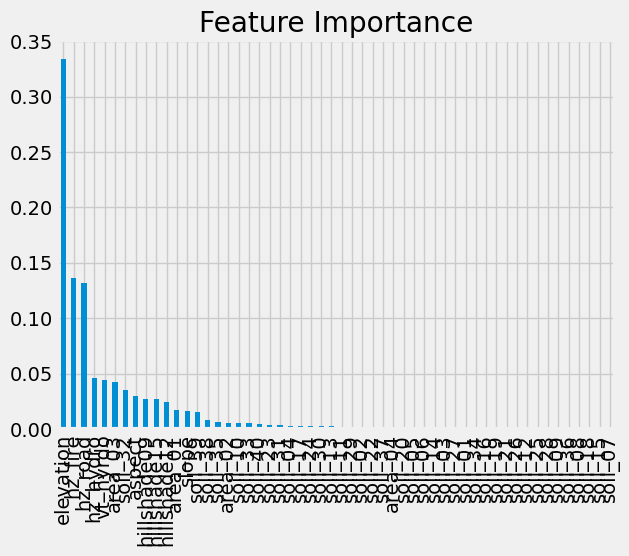

In [19]:
plt.style.use('fivethirtyeight')
feat_imp = pd.Series(importances, features).sort_values(ascending=False)
ax = feat_imp.plot(kind='bar', title='Feature Importance')

Using a Random Forest Classifier to predict the tree type based on 54 independent variables produced an r2 score of 0.92, which is very good.

Based on the graph above, it looks as though elevation, aspect and slope play the most critical roles in determining tree cover, with soil type being the least important.